# Бэггинг и случайный лес

Подключаем библиотеки

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import tree, ensemble, datasets, model_selection

import numpy as np
import pandas as pd

Загружаем dataset digits

In [3]:
digits = datasets.load_digits()

In [4]:
#информация о dataset'е
#print(digits['DESCR'])

Матрица признаков и вектор ответов

In [5]:
X = digits['data']
y = digits['target']

Размерности матрицы признаков и вектора ответов:

In [6]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


Значит у нас есть 1797 образцов рукописного ввода цифр

Визуализация нескольких образцов (взято из https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

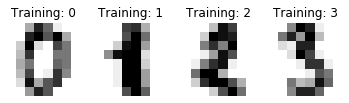

In [7]:
_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[:], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## 0. Функция для записи ответов в соответствующий файл

In [8]:
def write_ans_file(ans, file_number):
    
    with open("bagging_rf_ans"+str(file_number)+ ".txt", "w") as fout:
        fout.write(str(ans))

## 1. Decision Tree Classifier (Решающее дерево)

Создаем классификатор на основе решающего дерева с параметрами по умолчанию

In [23]:
dtc = tree.DecisionTreeClassifier()

Оцениваем качество с помощью метода cross_val_score, реализующим k-fold cross validation (скользящий контроль по k блокам). В нашем случае $k=10$, и в ответ записывается усредненнное значение.

In [24]:
scores_dtc = model_selection.cross_val_score(estimator=dtc, X=X, y=y, cv = 10)

In [25]:
scores_dtc

array([0.80540541, 0.84153005, 0.82320442, 0.77777778, 0.77094972,
       0.87150838, 0.89944134, 0.8258427 , 0.83615819, 0.81818182])

In [26]:
ans1 = scores_dtc.mean()
print("Ответ на первое задание: ", ans1)

Ответ на первое задание:  0.8269999805959702


In [27]:
write_ans_file(ans1, 1)

## 2. Bagging Classifier (Бэггинг над решающими деревьями)

Используем данный классификатор со всеми параметрами по умолчанию, кроме количества базовых алгоритмов (деревьев)

In [28]:
bc = ensemble.BaggingClassifier(n_estimators=100)

In [29]:
%%time
scores_bc = model_selection.cross_val_score(estimator=bc, X=X, y=y, cv = 10)

Wall time: 11.8 s


In [30]:
scores_bc

array([0.89189189, 0.95081967, 0.91712707, 0.93333333, 0.91620112,
       0.99441341, 0.96089385, 0.91011236, 0.8700565 , 0.92045455])

In [31]:
ans2 = scores_bc.mean()
print("Ответ на второе задание: ", ans2)

Ответ на первое задание:  0.9265303751248094


In [32]:
write_ans_file(ans2, 2)

## 3. Бэггинг над решающими деревьями с ограниченный количеством признаков для каждого базового алгоритма

Ограничиваем число признаков, на котором обучается отдельно взятое решающее дерево (базовый алгоритм) числом $\sqrt{d}$ - квадратным корнем из числа признаком (для регрессии было бы $d/3$):

In [34]:
# Число признаков:
print(X.shape[1])

64


In [40]:
n_feat = int(np.round(X.shape[1] ** 0.5))
print(n_feat)

8


In [41]:
bc_nf = ensemble.BaggingClassifier(n_estimators=100, max_features=n_feat)

In [42]:
%%time
scores_bc_nf = model_selection.cross_val_score(estimator=bc_nf, X=X, y=y, cv = 10)

Wall time: 3.34 s


In [43]:
scores_bc_nf

array([0.9027027 , 0.95628415, 0.94475138, 0.92222222, 0.94413408,
       0.95530726, 0.94972067, 0.96629213, 0.89830508, 0.90909091])

In [44]:
ans3 = scores_bc_nf.mean()
print("Ответ на третье задание: ", ans3)

Ответ на третье задание:  0.9348810598987175


In [45]:
write_ans_file(ans3, 3)

## 4. Бэггинг над решающими деревьями со случайным ограниченым набором признаков на каждом шаге построения базового алгоритма

In [48]:
bc_bf = ensemble.BaggingClassifier(base_estimator= tree.DecisionTreeClassifier(max_features=n_feat), n_estimators=100)

In [51]:
%%time
scores_bc_bf = model_selection.cross_val_score(estimator=bc_bf, X=X, y=y, cv = 10)

Wall time: 3.22 s


In [52]:
scores_bc_bf

array([0.9027027 , 0.96721311, 0.94475138, 0.95555556, 0.95530726,
       0.96648045, 0.98324022, 0.96067416, 0.94915254, 0.94318182])

In [53]:
ans4 = scores_bc_bf.mean()
print("Ответ на четвертоезадание: ", ans4)

Ответ на четвертоезадание:  0.9528259205046791


In [79]:
write_ans_file(ans4, 4)

## 5. Сравнение с RandomForestClassifier

In [55]:
rf = ensemble.RandomForestClassifier(n_estimators=100, max_features=n_feat)

In [56]:
%%time
scores_rf = model_selection.cross_val_score(estimator=rf, X=X, y=y, cv = 10)

Wall time: 2.84 s


In [57]:
scores_rf

array([0.9027027 , 0.97814208, 0.94475138, 0.96666667, 0.94972067,
       0.97765363, 0.98324022, 0.97752809, 0.93785311, 0.9375    ])

In [59]:
scores_rf.mean()

0.955575854945951

#### Зависимость качества от количества базовых алгоритмов

In [83]:
n_est_array = np.array([1, 5, 10, 25, 30, 50, 75, 100, 200, 300])
score_array = np.zeros(n_est_array.shape)

In [84]:
%%time
for i in range(n_est_array.shape[0]):
    rf = ensemble.RandomForestClassifier(n_estimators = n_est_array[i], max_features=n_feat)
    score_array[i] = model_selection.cross_val_score(estimator=rf, X=X, y=y, cv = 10).mean()

Wall time: 22.6 s


Text(0, 0.5, 'Усредненное качество при кросс-валидации')

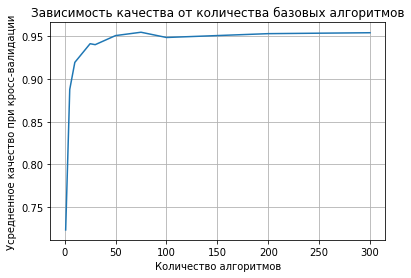

In [86]:
pylab.grid()
pylab.plot(n_est_array, score_array)
pylab.title('Зависимость качества от количества базовых алгоритмов')
pylab.xlabel('Количество алгоритмов')
pylab.ylabel('Усредненное качество при кросс-валидации')

Выводы:
1. Случайный лес не переобучается с ростом количества деревьев
2. При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев
3.  С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется

#### Зависимость качества от числа признаков, выбираемых при построении вершины

In [94]:
d_array = np.array([1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 64])
score_array = np.zeros(d_array.shape)

In [98]:
%%time
for i in range(d_array.shape[0]):
    rf = ensemble.RandomForestClassifier(n_estimators = 100, max_features=d_array[i])
    score_array[i] = model_selection.cross_val_score(estimator=rf, X=X, y=y, cv = 10).mean()

Wall time: 1min 35s


Text(0, 0.5, 'Усредненное качество при кросс-валидации')

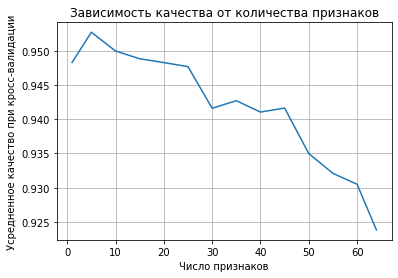

In [99]:
pylab.grid()
pylab.plot(d_array, score_array)
pylab.title('Зависимость качества от количества признаков')
pylab.xlabel('Число признаков')
pylab.ylabel('Усредненное качество при кросс-валидации')

Вывод:

При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

#### Зависимость качества от глубины дерева

In [102]:
depth_array = np.array([1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 40, 50, 100, 150])
score_array = np.zeros(depth_array.shape)

In [103]:
%%time
for i in range(depth_array.shape[0]):
    rf = ensemble.RandomForestClassifier(n_estimators = 100, max_features='auto', max_depth=depth_array[i])
    score_array[i] = model_selection.cross_val_score(estimator=rf, X=X, y=y, cv = 10).mean()

Wall time: 32.9 s


Text(0, 0.5, 'Усредненное качество при кросс-валидации')

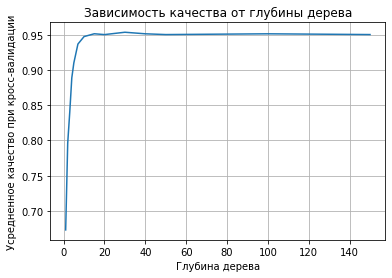

In [105]:
pylab.grid()
pylab.plot(depth_array, score_array)
pylab.title('Зависимость качества от глубины дерева')
pylab.xlabel('Глубина дерева')
pylab.ylabel('Усредненное качество при кросс-валидации')